In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
# Load Data
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [40]:
# Target & features
X = df.drop("Heart Disease", axis=1)
y = df['Heart Disease']

In [41]:
# Train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [48]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [25]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(Xtrain_scaled, ytrain)

log_pred = log_model.predict(Xtest_scaled)

In [27]:
# Random Forest (Scaling is not required but can pass scaled data)
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(Xtrain, ytrain)

rf_pred = rf_model.predict(Xtest)

In [28]:
# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)


In [29]:
# Logistic Regression metrics
print(f"Logistic Regression \nAccuracy: {accuracy_score(ytest, log_pred)}\n")
print(f"Logistic Regression \nClassification Report:\n{classification_report(ytest, log_pred)}")

Logistic Regression 
Accuracy: 0.8518518518518519

Logistic Regression 
Classification Report:
              precision    recall  f1-score   support

     Absence       0.92      0.80      0.86        30
    Presence       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



In [30]:
# Random Forest metrics
print(f"Random Forest \nAccuracy: {accuracy_score(ytest, rf_pred)}\n")
print(f"Random Forest \nClassification Report:\n{classification_report(ytest, rf_pred)}")

Random Forest 
Accuracy: 0.8333333333333334

Random Forest 
Classification Report:
              precision    recall  f1-score   support

     Absence       0.86      0.83      0.85        30
    Presence       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



In [31]:
# ROC-AUC
log_acc = roc_auc_score(ytest, log_model.predict_proba(Xtest_scaled)[:,1])
rf_acc = roc_auc_score(ytest, rf_model.predict_proba(Xtest)[:,1])

print(f"Logictic AUC: {log_acc}")
print(f"Random Forest AUC: {log_acc}")

Logictic AUC: 0.898611111111111
Random Forest AUC: 0.898611111111111


In [32]:
# Feature Importance (Model Based)
# Random Forest Feature IMportance
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(f"Random Forest \"Feature Importance\"\n{feature_importance}")

Random Forest "Feature Importance"
Chest pain type            0.124531
Thallium                   0.117067
Max HR                     0.116834
Number of vessels fluro    0.112811
ST depression              0.101949
Cholesterol                0.088941
Age                        0.082177
BP                         0.075711
Slope of ST                0.056808
Exercise angina            0.055554
Sex                        0.040785
EKG results                0.017250
FBS over 120               0.009584
dtype: float64


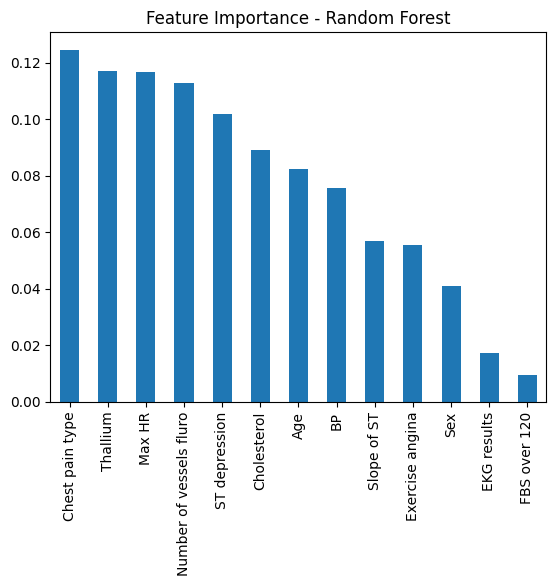

In [33]:
import matplotlib.pyplot as plt
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()

In [34]:
# Logistic Regression Coefficients
coef_df = pd.Series(
    log_model.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

print(f"Linear Regression \"Feature Importance\"\n{coef_df}")

Linear Regression "Feature Importance"
Number of vessels fluro    1.185769
Sex                        0.892690
Chest pain type            0.716115
Thallium                   0.584150
Exercise angina            0.481365
Slope of ST                0.413009
BP                         0.408808
Max HR                    -0.399470
FBS over 120              -0.347914
Cholesterol                0.341274
ST depression              0.240702
EKG results                0.073109
Age                        0.025068
dtype: float64


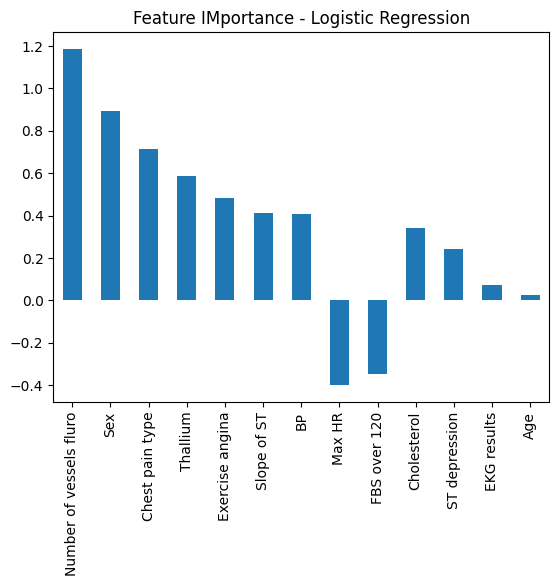

In [35]:
coef_df.plot(kind='bar')
plt.title("Feature IMportance - Logistic Regression")
plt.show()

In [ ]:
# Save Linear Regression Model and Object Scaler
import joblib as b
b.dump(log_model, "logistic_model.pkl")
b.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [37]:
# Save Random Forest Model
b.dump(rf_model, "Random_Forest_model.pkl")

['Random_Forest_model.pkl']